In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import tarfile
#tf = tarfile.open('aclImdb_v1.tar.gz')
#tf.extractall(r"C:\Users\devro\Desktop\Jupyter\chapter 7 dataset")

In [3]:
from sklearn.datasets import load_files
reviews_train = load_files('C:/Users/devro/Desktop/Jupyter/chapter 7 dataset/aclImdb/train/')
text_train,y_train = reviews_train.data,reviews_train.target
print(type(text_train))
print(len(text_train))
print(text_train[1])

<class 'list'>
25000
b'Words can\'t describe how bad this movie is. I can\'t explain it by writing only. You have too see it for yourself to get at grip of how horrible a movie really can be. Not that I recommend you to do that. There are so many clich\xc3\xa9s, mistakes (and all other negative things you can imagine) here that will just make you cry. To start with the technical first, there are a LOT of mistakes regarding the airplane. I won\'t list them here, but just mention the coloring of the plane. They didn\'t even manage to show an airliner in the colors of a fictional airline, but instead used a 747 painted in the original Boeing livery. Very bad. The plot is stupid and has been done many times before, only much, much better. There are so many ridiculous moments here that i lost count of it really early. Also, I was on the bad guys\' side all the time in the movie, because the good guys were so stupid. "Executive Decision" should without a doubt be you\'re choice over this one

In [4]:
print(type(text_train))
print(len(text_train))
print(np.bincount(y_train))

<class 'list'>
25000
[12500 12500]


In [5]:
reviews_test = load_files('C:/Users/devro/Desktop/Jupyter/chapter 7 dataset/aclImdb/test/')
text_test,y_test = reviews_test.data,reviews_test.target


In [6]:
print(type(text_test))
print(len(text_test))
print(np.bincount(y_test))

<class 'list'>
25000
[12500 12500]


In [7]:
text_train = [doc.replace(b"<br />",b" ") for doc in text_train]

In [8]:
type(text_train[1])

bytes

In [9]:
text_test = [doc.replace(b"<br />",b" ") for doc in text_test]

In [10]:
words =["The fool doth think he is wise,","but the wise man knows himself to be a fool"]


In [11]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(words)

CountVectorizer()

In [12]:
print(vect.vocabulary_)
print(len(vect.vocabulary_),len(words))
print(type(vect.vocabulary_))
sorted_vect = sorted(vect.vocabulary_.items(),key=lambda x:x[1])
print(sorted_vect)

{'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}
13 2
<class 'dict'>
[('be', 0), ('but', 1), ('doth', 2), ('fool', 3), ('he', 4), ('himself', 5), ('is', 6), ('knows', 7), ('man', 8), ('the', 9), ('think', 10), ('to', 11), ('wise', 12)]


In [13]:
bag_of_words = vect.transform(words)
print(repr(bag_of_words))

<2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>


In [14]:
wor = ["Hi there, can we talk for sec"]
vect.fit(wor)
print(vect.vocabulary_)

{'hi': 2, 'there': 5, 'can': 0, 'we': 6, 'talk': 4, 'for': 1, 'sec': 3}


In [15]:
dic = {2:8,1:7,9:70,4:89}
print(dic)

{2: 8, 1: 7, 9: 70, 4: 89}


In [16]:
sorted(dic.items(),key
       =lambda x:x[0])

[(1, 7), (2, 8), (4, 89), (9, 70)]

In [17]:
vect = CountVectorizer()
vect.fit(words)
print(vect.vocabulary_)
print(sorted(vect.vocabulary_.items(),key=lambda x: x[1]))

{'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}
[('be', 0), ('but', 1), ('doth', 2), ('fool', 3), ('he', 4), ('himself', 5), ('is', 6), ('knows', 7), ('man', 8), ('the', 9), ('think', 10), ('to', 11), ('wise', 12)]


In [18]:
# words =["The fool doth think he is wise,","but the wise man knows himself to be a fool"]
bag_of_words.toarray()

array([[0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1],
       [1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1]], dtype=int64)

In [19]:
bag_of_words

<2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>

In [20]:
vect = CountVectorizer().fit(text_train)
#X_train = vect.transform(text_train)
vect

CountVectorizer()

In [21]:
X_train = vect.transform(text_train)
print(repr(X_train))

<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>


In [22]:
features = vect.get_feature_names()
print(len(features))
print(features[0:20])
print(features[3990:4010])

74849
['00', '000', '0000000000001', '00001', '00015', '000s', '001', '003830', '006', '007', '0079', '0080', '0083', '0093638', '00am', '00pm', '00s', '01', '01pm', '02']
['apsion', 'apt', 'aptitude', 'aptly', 'aptness', 'aq', 'aqua', 'aquafresh', 'aquaintance', 'aquaman', 'aquarian', 'aquarium', 'aquariums', 'aquarius', 'aquart', 'aquatania', 'aquatic', 'aquawhite', 'aquilae', 'aquino']


In [23]:
wor = vect.transform(words)
wor.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
scores = cross_val_score(LogisticRegression(),X_train,y_train,cv=5)
print(scores)
print(scores.mean())

[0.8834 0.8756 0.886  0.8894 0.8752]
0.8819199999999998


In [25]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best cross-validation score: 0.89
Best parameters:  {'C': 0.1}


In [26]:
X_test = vect.transform(text_test)
grid.score(X_test,y_test)

0.87888

In [27]:
vect = CountVectorizer(min_df = 5).fit(text_train)
X_train = vect.transform(text_train)
print(repr(X_train))

<25000x27271 sparse matrix of type '<class 'numpy.int64'>'
	with 3354014 stored elements in Compressed Sparse Row format>


In [28]:
features = vect.get_feature_names()
print(len(features))
print(features[0:20])
print(features[3980:4000])

27271
['00', '000', '007', '00s', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '100', '1000', '100th', '101', '102', '103']
['cell', 'cellar', 'cellphone', 'cells', 'celluloid', 'celtic', 'cement', 'cemented', 'cemetery', 'cena', 'censor', 'censored', 'censors', 'censorship', 'cent', 'center', 'centered', 'centering', 'centerpiece', 'centers']


In [29]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best cross-validation score: 0.89


In [30]:
X_test = vect.transform(text_test)
grid.score(X_test,y_test)

0.8772

In [31]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print(len(ENGLISH_STOP_WORDS))
print(list(ENGLISH_STOP_WORDS)[::10])

318
['against', 'much', 'well', 'seems', 'ourselves', 'most', 'the', 'detail', 'cry', 'while', 'this', 'part', 'beside', 'whence', 'very', 'could', 'three', 'without', 'whereby', 'amongst', 'perhaps', 'eg', 'them', 'other', 'he', 'another', 'her', 'be', 'nobody', 'anything', 'wherever', 'name']


In [32]:
vect = CountVectorizer(min_df=5,stop_words="english").fit(text_train)
X_train = vect.transform(text_train)
print(repr(X_train))
features = vect.get_feature_names()
print(features[:20])

<25000x26966 sparse matrix of type '<class 'numpy.int64'>'
	with 2149958 stored elements in Compressed Sparse Row format>
['00', '000', '007', '00s', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '100', '1000', '100th', '101', '102', '103']


In [33]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best cross-validation score: 0.88


In [34]:
X_test = vect.transform(text_test)
grid.score(X_test,y_test)

0.87264

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer(min_df=5, norm=None),
 LogisticRegression())
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))


Best cross-validation score: 0.89


In [36]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
# transform the training dataset
X_train = vectorizer.transform(text_train)
# find maximum value for each of the features over the dataset
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# get feature names
feature_names = np.array(vectorizer.get_feature_names())
print("Features with lowest tfidf:\n{}".format(
 feature_names[sorted_by_tfidf[:20]]))
print("Features with highest tfidf: \n{}".format(
 feature_names[sorted_by_tfidf[-20:]]))

Features with lowest tfidf:
['poignant' 'disagree' 'instantly' 'importantly' 'lacked' 'occurred'
 'currently' 'altogether' 'nearby' 'undoubtedly' 'directs' 'fond'
 'stinker' 'avoided' 'emphasis' 'commented' 'disappoint' 'realizing'
 'downhill' 'inane']
Features with highest tfidf: 
['coop' 'homer' 'dillinger' 'hackenstein' 'gadget' 'taker' 'macarthur'
 'vargas' 'jesse' 'basket' 'dominick' 'the' 'victor' 'bridget' 'victoria'
 'khouri' 'zizek' 'rob' 'timon' 'titanic']


In [37]:
sorted_idf = np.argsort(vectorizer.idf_)
print(feature_names[sorted_idf[0:100]])

['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'have' 'one' 'be' 'film' 'are' 'you' 'all'
 'at' 'an' 'by' 'so' 'from' 'like' 'who' 'they' 'there' 'if' 'his' 'out'
 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'good' 'can' 'more' 'when'
 'time' 'up' 'very' 'even' 'only' 'no' 'would' 'my' 'see' 'really' 'story'
 'which' 'well' 'had' 'me' 'than' 'much' 'their' 'get' 'were' 'other'
 'been' 'do' 'most' 'don' 'her' 'also' 'into' 'first' 'made' 'how' 'great'
 'because' 'will' 'people' 'make' 'way' 'could' 'we' 'bad' 'after' 'any'
 'too' 'then' 'them' 'she' 'watch' 'think' 'acting' 'movies' 'seen' 'its'
 'him']


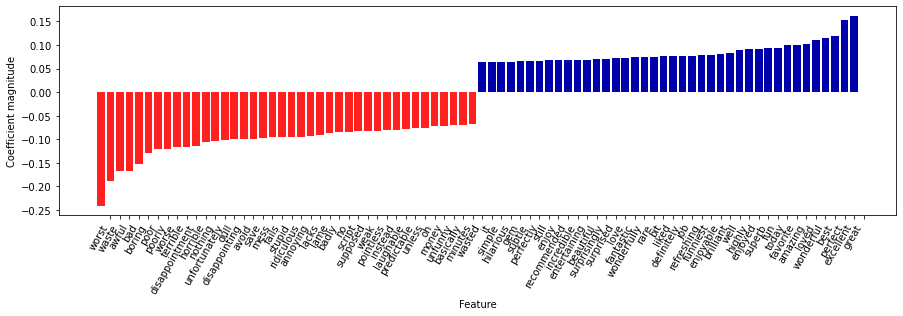

In [38]:
import mglearn
mglearn.tools.visualize_coefficients(grid.best_estimator_.named_steps["logisticregression"].coef_,
 feature_names, n_top_features=40)


In [39]:
words

['The fool doth think he is wise,',
 'but the wise man knows himself to be a fool']

In [40]:
cv = CountVectorizer(ngram_range=(1,1)).fit(words)
print(len(cv.vocabulary_))
print(cv.vocabulary_)
print(cv.get_feature_names())

13
{'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}
['be', 'but', 'doth', 'fool', 'he', 'himself', 'is', 'knows', 'man', 'the', 'think', 'to', 'wise']


In [41]:
cv = CountVectorizer(ngram_range=(2,2)).fit(words)
print(len(cv.vocabulary_))
print(cv.get_feature_names())

14
['be fool', 'but the', 'doth think', 'fool doth', 'he is', 'himself to', 'is wise', 'knows himself', 'man knows', 'the fool', 'the wise', 'think he', 'to be', 'wise man']


In [42]:
print(cv.transform(words).toarray())

[[0 0 1 1 1 0 1 0 0 1 0 1 0 0]
 [1 1 0 0 0 1 0 1 1 0 1 0 1 1]]


In [43]:
cv = CountVectorizer(ngram_range=(1,3)).fit(words)
print(len(cv.vocabulary_))
print(cv.get_feature_names())

39
['be', 'be fool', 'but', 'but the', 'but the wise', 'doth', 'doth think', 'doth think he', 'fool', 'fool doth', 'fool doth think', 'he', 'he is', 'he is wise', 'himself', 'himself to', 'himself to be', 'is', 'is wise', 'knows', 'knows himself', 'knows himself to', 'man', 'man knows', 'man knows himself', 'the', 'the fool', 'the fool doth', 'the wise', 'the wise man', 'think', 'think he', 'think he is', 'to', 'to be', 'to be fool', 'wise', 'wise man', 'wise man knows']


In [44]:
pipe = make_pipeline(TfidfVectorizer(min_df=5),LogisticRegression())
param_grid = {'tfidfvectorizer__ngram_range':[(1,1),(1,2),(1,3)],
              'logisticregression__C':[0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipe,param_grid = param_grid,cv=5)
grid.fit(text_train,y_train)
print(grid.best_score_)
print(grid.best_params_)

0.9064
{'logisticregression__C': 100, 'tfidfvectorizer__ngram_range': (1, 3)}


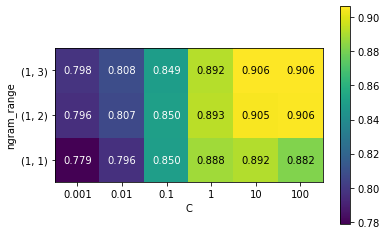

In [45]:
scores = grid.cv_results_['mean_test_score'].reshape(-1, 3).T
# visualize heat map
heatmap = mglearn.tools.heatmap(
 scores, xlabel="C", ylabel="ngram_range", cmap="viridis", fmt="%.3f",
 xticklabels=param_grid['logisticregression__C'],
 yticklabels=param_grid['tfidfvectorizer__ngram_range'])
plt.colorbar(heatmap)


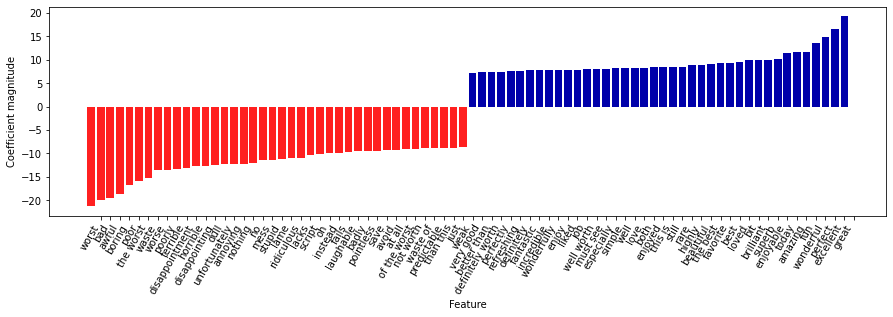

In [46]:
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef, feature_names, n_top_features=40)


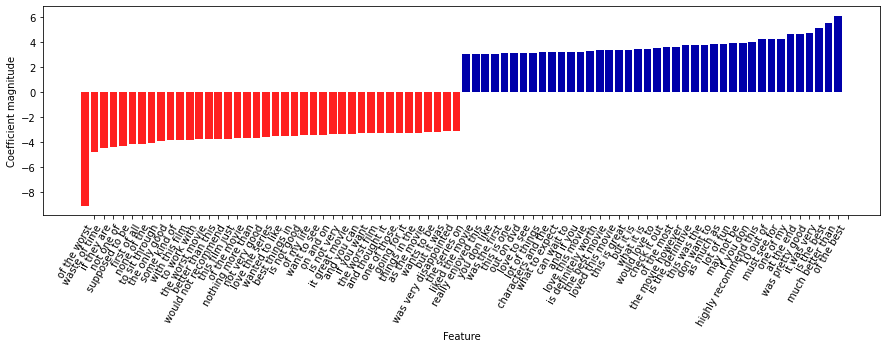

In [47]:
# find 3-gram features
mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 3
# visualize only 3-gram features
mglearn.tools.visualize_coefficients(coef.ravel()[mask],
 feature_names[mask], n_top_features=40)


In [48]:
import spacy
import nltk
en_nlp = spacy.load('en')
stemmer = nltk.stem.PorterStemmer()
def compare_normalization(doc):
    doc_spacy = en_nlp(doc)
    print("Lemmization")
    print([token.lemma_ for token in doc_spacy])
    print("Stemming")
    print([stemmer.stem(tokem.norm_.lower()) for token in doc_spacy])

OSError: [E941] Can't find model 'en'. It looks like you're trying to load a model from a shortcut, which is obsolete as of spaCy v3.0. To load the model, use its full name instead:

nlp = spacy.load("en_core_web_sm")

For more details on the available models, see the models directory: https://spacy.io/models. If you want to create a blank model, use spacy.blank: nlp = spacy.blank("en")

In [49]:
compare_normalization(u"Our meeting today was worse than yesterday, "
 "I'm scared of meeting the clients tomorrow.")

NameError: name 'compare_normalization' is not defined

In [50]:
import re
# regexp used in CountVectorizer
regexp = re.compile('(?u)\\b\\w\\w+\\b')
# load spacy language model and save old tokenizer
en_nlp = spacy.load('en')
old_tokenizer = en_nlp.tokenizer
# replace the tokenizer with the preceding regexp
en_nlp.tokenizer = lambda string: old_tokenizer.tokens_from_list(
 regexp.findall(string))
# create a custom tokenizer using the spacy document processing pipeline
# (now using our own tokenizer)
def custom_tokenizer(document):
 doc_spacy = en_nlp(document, entity=False, parse=False)
 return [token.lemma_ for token in doc_spacy]
# define a count vectorizer with the custom tokenizer
lemma_vect = CountVectorizer(tokenizer=custom_tokenizer, min_df=5)


OSError: [E941] Can't find model 'en'. It looks like you're trying to load a model from a shortcut, which is obsolete as of spaCy v3.0. To load the model, use its full name instead:

nlp = spacy.load("en_core_web_sm")

For more details on the available models, see the models directory: https://spacy.io/models. If you want to create a blank model, use spacy.blank: nlp = spacy.blank("en")

In [51]:
# transform text_train using CountVectorizer with lemmatization
X_train_lemma = lemma_vect.fit_transform(text_train)
print("X_train_lemma.shape: {}".format(X_train_lemma.shape))
# standard CountVectorizer for reference
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("X_train.shape: {}".format(X_train.shape))

NameError: name 'lemma_vect' is not defined

In [52]:
# build a grid search using only 1% of the data as the training set
from sklearn.model_selection import StratifiedShuffleSplit
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
cv = StratifiedShuffleSplit(n_iter=5, test_size=0.99,
 train_size=0.01, random_state=0)
grid = GridSearchCV(LogisticRegression(), param_grid, cv=cv)
# perform grid search with standard CountVectorizer
grid.fit(X_train, y_train)
print("Best cross-validation score "
 "(standard CountVectorizer): {:.3f}".format(grid.best_score_))
# perform grid search with lemmatization
grid.fit(X_train_lemma, y_train)
print("Best cross-validation score "
 "(lemmatization): {:.3f}".format(grid.best_score_))

TypeError: __init__() got an unexpected keyword argument 'n_iter'

In [53]:
vect = CountVectorizer(max_features=10000,max_df = 0.15)
X = vect.fit_transform(text_train)

In [54]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, learning_method="batch",
 max_iter=25, random_state=0)
# We build the model and transform the data in one step
# Computing transform takes some time,
# and we can save time by doing both at once
document_topics = lda.fit_transform(X)


In [55]:
lda.components_.shape

(10, 10000)

In [ ]:
sorting = np.argsort(lda.components_,axis=1)[:,::-1]
features_names = np.array(vect.get_feature_names_out())

In [57]:
features_names 

array(['00', '000', '10', ..., 'zoom', 'zorro', 'zu'], dtype='<U17')

In [58]:
# Print out the 10 topics:
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names,
 sorting=sorting, topics_per_chunk=5, n_words=10)


topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
80 comedy     an unforgettableactually surprisedam sorry to   acted by      
and all three and after seeingand again it  always wanted altman the    
actors speakingan irritating about those   actor and actress1950 and      
also director all the major an editor     an imaginativean eighth     
all what      1957          admirer of    actor and he  and all her   
60s it        acting is aboutalso completelyam sure       abandons      
and after     advice and    an accurate portrayalalways have toan up         
acting was awfulall my life   12 years old  all my life   all right but 
abhay         all the talentall pretty    an attorney   acting to be  
acting and evenallows you    an uneven     and all her   addict and    


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      -------- 

In [59]:
lda100 = LatentDirichletAllocation(n_components=100, learning_method="batch",
 max_iter=25, random_state=0)
document_topics100 = lda100.fit_transform(X)

In [60]:
topics = np.array([7, 16, 24, 25, 28, 36, 37, 45, 51, 53, 54, 63, 89, 97])
sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())
mglearn.tools.print_topics(topics=topics, feature_names=feature_names,
 sorting=sorting, topics_per_chunk=7, n_words=20)


topic 7       topic 16      topic 24      topic 25      topic 28      topic 36      topic 37      
--------      --------      --------      --------      --------      --------      --------      
thriller      worst         german        car           beautiful     performance   excellent     
suspense      awful         hitler        gets          young         role          highly        
horror        boring        nazi          guy           old           actor         amazing       
atmosphere    horrible      midnight      around        romantic      cast          wonderful     
mystery       stupid        joe           down          between       play          truly         
house         thing         germany       kill          romance       actors        superb        
director      terrible      years         goes          wonderful     performances  actors        
quite         script        history       killed        heart         played        brilliant     
bit       

In [61]:
music = np.argsort(document_topics100[:, 45])[::-1]
# print the five documents where the topic is most important
for i in music[:10]:
 # pshow first two sentences
 print(b".".join(text_train[i].split(b".")[:2]) + b".\n")

b'I love this movie and never get tired of watching. The music in it is great.\n'
b"I enjoyed Still Crazy more than any film I have seen in years. A successful band from the 70's decide to give it another try.\n"
b'Hollywood Hotel was the last movie musical that Busby Berkeley directed for Warner Bros. His directing style had changed or evolved to the point that this film does not contain his signature overhead shots or huge production numbers with thousands of extras.\n'
b"What happens to washed up rock-n-roll stars in the late 1990's? They launch a comeback / reunion tour. At least, that's what the members of Strange Fruit, a (fictional) 70's stadium rock group do.\n"
b'As a big-time Prince fan of the last three to four years, I really can\'t believe I\'ve only just got round to watching "Purple Rain". The brand new 2-disc anniversary Special Edition led me to buy it.\n'
b"This film is worth seeing alone for Jared Harris' outstanding portrayal of John Lennon. It doesn't matter that H

In [63]:
fig,ax = plt.figure(1,2,figsize=(10,10))
topic_names = ["{:>2} ".format(i) + " ".join(words) for i, words in enumerate(feature_names[sorting[:, :2]])]
for col in [0,1]:
    start = col*50
    end = (col+1)*50
    ax[col].barh(np.arange(50),np.sum(document_topics100,axis=0)[start:end])
    x[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()


TypeError: figure() got multiple values for argument 'figsize'